# Project: **Newton's Method** for **Logistic Regression**

This notebook is a blank slate for you to write in.  Feel free to include figures (don't forget to add/commit them to your repository) and examples.  You can change the kernel (from `Python 3`; see upper right) if the open source project you're writing about does not use Python.  You can write from the prompts below or delete all the cells and start fresh.  Note that Git will always contain your history.

You can run shell commands:

In [1]:
! ls

project.ipynb  README.md


and include code snippets

```c
double square(double x) {
    return x*x;
}
```
or code cells

In [2]:
def square(x):
    return x*x

print(f'square(3) = {square(3)}')

square(3) = 9


## Application description:
We're going to compute the probability that someone has Diabetes given their height, weight, and blood pressure. We'll generate this data ourselves (toy data), plot it, learn a logistic regression curve using Newton's Method for Optimization, then use that curve to predict the probability someone new with these 3 features has diabetes. We'll use Calculus, Probability Theory, Statistics, and Linear Algebra to do this. Get ready, ish is about to go down.

## About the method


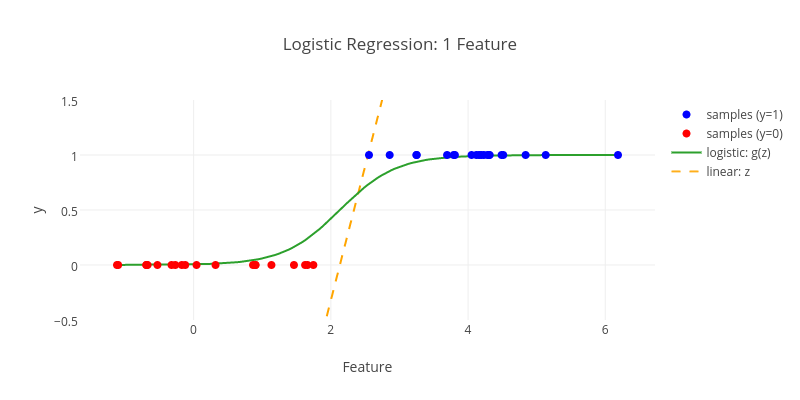

In [19]:
from IPython.display import Image
Image(filename = "project1.png",width = 1000,height = 500)

In this application, they use newton's method for Optimization.

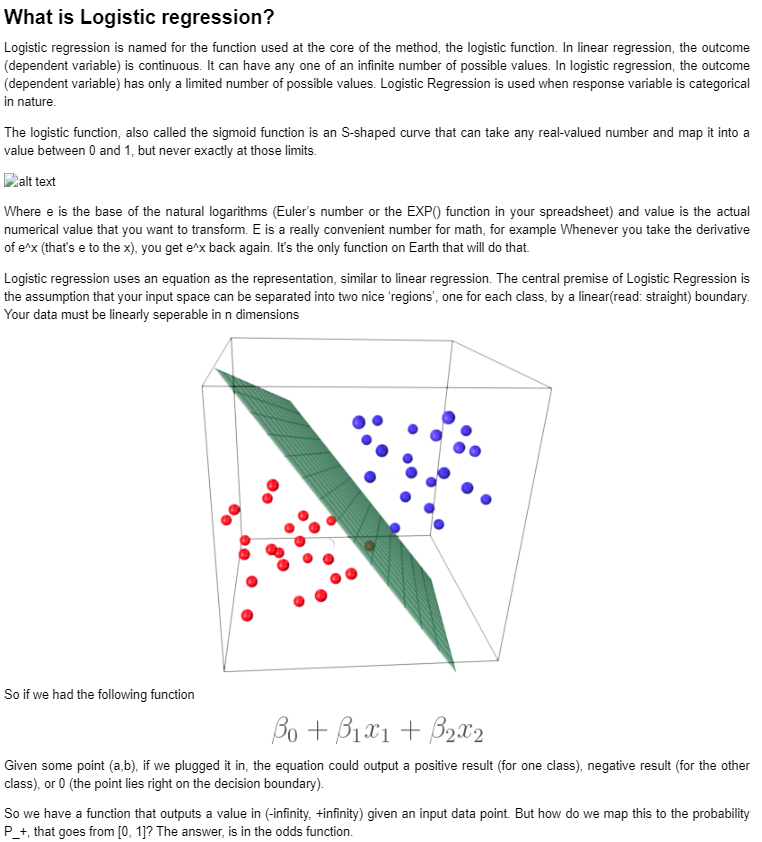

In [25]:
from IPython.display import Image
Image(filename = "project2.png",width = 800,height = 1000)

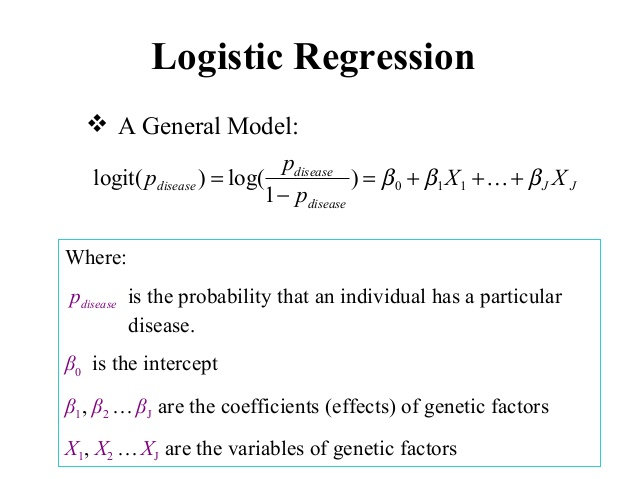

In [27]:
from IPython.display import Image
Image(filename = "project3.jpg",width = 600,height = 800)

## Why use Newton's Method for optimizing?
Newton’s method usually converges faster than gradient descent when maximizing logistic regression log likelihood. <br>
Each iteration is more expensive than gradient descent because of calculating inverse of Hessian<br>
As long as data points are not very large, Newton’s methods are preferred

## Algorithm Setup
We begin with a quick function for catching singular matrix errors that we will use to decorate our Newton steps.

In [31]:
%matplotlib inline

#matrix math
import numpy as np
#data manipulation
import pandas as pd
#matrix data structure
from patsy import dmatrices
#for error logging
import warnings

In [29]:
#like dividing by zero (Wtff omgggggg universe collapses)
def catch_singularity(f):
    '''Silences LinAlg Errors and throws a warning instead.'''
    
    def silencer(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except np.linalg.LinAlgError:
            warnings.warn('Algorithm terminated - singular Hessian!')
            return args[0]
    return silencer

In [30]:
@catch_singularity
def newton_step(curr, X, lam=None):
    '''One naive step of Newton's Method'''
    
    #how to compute inverse? http://www.mathwarehouse.com/algebra/matrix/images/square-matrix/inverse-matrix.gif
    
    ## compute necessary objects
    #create probability matrix, miniminum 2 dimensions, tranpose (flip it)
    p = np.array(sigmoid(X.dot(curr[:,0])), ndmin=2).T
    #create weight matrix from it
    W = np.diag((p*(1-p))[:,0])
    #derive the hessian 
    hessian = X.T.dot(W).dot(X)
    #derive the gradient
    grad = X.T.dot(y-p)
    
    ## regularization step (avoiding overfitting)
    if lam:
        # Return the least-squares solution to a linear matrix equation
        step, *_ = np.linalg.lstsq(hessian + lam*np.eye(curr.shape[0]), grad)
    else:
        step, *_ = np.linalg.lstsq(hessian, grad)
        
    ## update our 
    beta = curr + step
    
    return beta

## About the software

Link to the repository: https://github.com/llSourcell/logistic_regression_newtons_method/blob/master/NewtonCode.ipynb. <br> 
The developer is IISourcell, and the code is written in python.
